In [8]:
import numpy as np
import pandas as pd
import nltk
import string
import re

#from wordcloud import WordCloud
import matplotlib.pyplot as plt
from string import punctuation
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from nltk.corpus import stopwords


In [34]:
!pip install wordcloud

In [35]:
from wordcloud import WordCloud

In [36]:
fake = pd.DataFrame(pd.read_excel('./politics_fake2016.xlsx'))

In [37]:
fake.head()

,title,text,subject,date
0,TRUMP DITCHES PRESS To Make “Last Minute” Surp...,President-elect Donald Trump played a round of...,politics,2016-12-31
1,"COUNTDOWN TICKER: Obama Leaves Office In…5,4,3...",(function(){ var s=document.createElement('scr...,politics,2016-12-31
2,BOOM! TOMI LAHREN’S Top Tips For Liberals In 2...,,politics,2016-12-31
3,"YES, OBAMA…There Is A Magic Wand! [Video]",,politics,2016-12-31
4,HA! DONALD TRUMP’S Unusual New Year’s Tweet To...,President-elect Donald Trump is throwing a pri...,politics,2016-12-31


In [38]:
fake['label']='0'

In [39]:
true = pd.DataFrame(pd.read_excel('./politics_true2016.xlsx'))

In [40]:
true.head()

,title,text,subject,date
0,Mormon Tabernacle Choir member resigns rather ...,(Reuters) - A member of the Mormon Tabernacle ...,politicsNews,2016-12-30 00:00:00
1,Obama to meet lawmakers in attempt to protect ...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,2016-12-30 00:00:00
2,Lockheed Martin wins $450 million Pentagon con...,WASHINGTON (Reuters) - Lockheed Martin Corp ha...,politicsNews,2016-12-29 00:00:00
3,Trump fans' 'Deploraball' party shows rift in ...,NEW YORK (Reuters) - Supporters of U.S. Presid...,politicsNews,2016-12-29 00:00:00
4,Obama sanctions Russia for intervening in 2016...,HONOLULU (Reuters) - President Barack Obama on...,politicsNews,2016-12-29 00:00:00


In [41]:
true['label']='1'

In [42]:
news=fake.append(true)

In [43]:
news.head()

,title,text,subject,date,label
0,TRUMP DITCHES PRESS To Make “Last Minute” Surp...,President-elect Donald Trump played a round of...,politics,2016-12-31 00:00:00,0
1,"COUNTDOWN TICKER: Obama Leaves Office In…5,4,3...",(function(){ var s=document.createElement('scr...,politics,2016-12-31 00:00:00,0
2,BOOM! TOMI LAHREN’S Top Tips For Liberals In 2...,,politics,2016-12-31 00:00:00,0
3,"YES, OBAMA…There Is A Magic Wand! [Video]",,politics,2016-12-31 00:00:00,0
4,HA! DONALD TRUMP’S Unusual New Year’s Tweet To...,President-elect Donald Trump is throwing a pri...,politics,2016-12-31 00:00:00,0


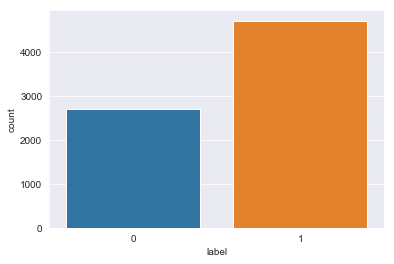

In [44]:
sns.set_style("darkgrid")
sns.countplot(news.label)

In [45]:
#data cleaning

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)


In [46]:
def strip_html(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip().lower())
    return " ".join(final_text)

#Removing punctuation
def remove_punctuation(text):
    pattern = '[’!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+'
    text = re.sub(pattern,'',text)
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    text = remove_punctuation(text)
    text.lower()
    return text


In [47]:
#Apply function on text and title column
news['text']=news['text'].apply(denoise_text)
news['title']=news['title'].apply(denoise_text)

C:\Users\Administrator\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://www.youtube.com/watch?v=IioEIUmawRo" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Administrator\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://www.youtube.com/watch?v=31MRqr9ydUU" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Administrator\Anaconda3\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://www.youtube.com/watch?v=wYdX071Nlow" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the doc

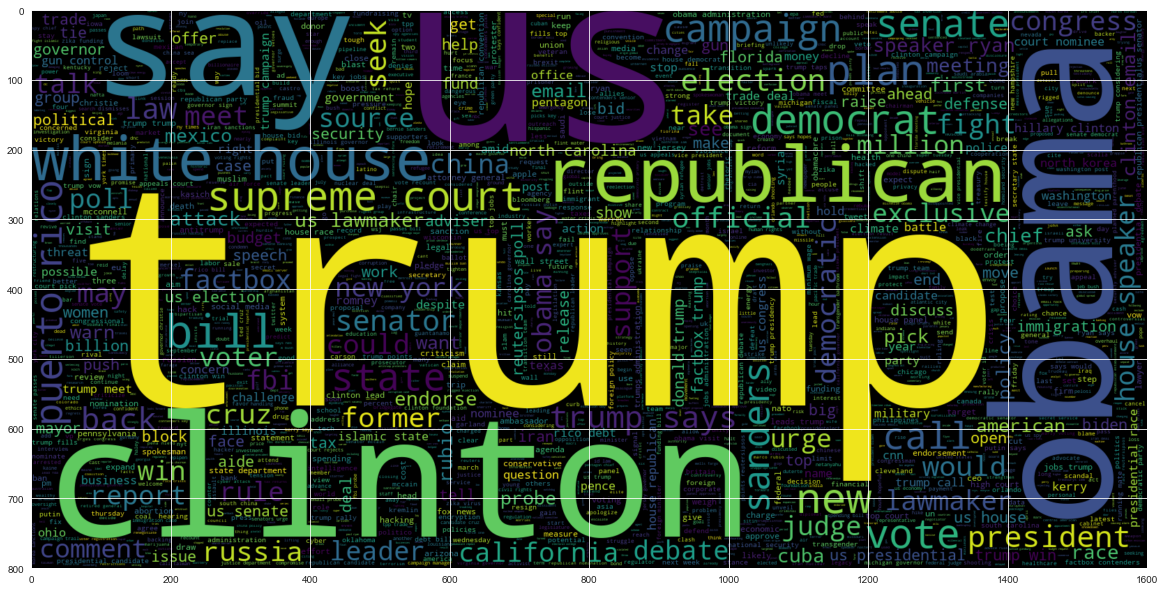

In [75]:
#wordcloud based on title
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop).generate(" ".join(news[news.label == '1'].title))
plt.imshow(wc , interpolation = 'bilinear')

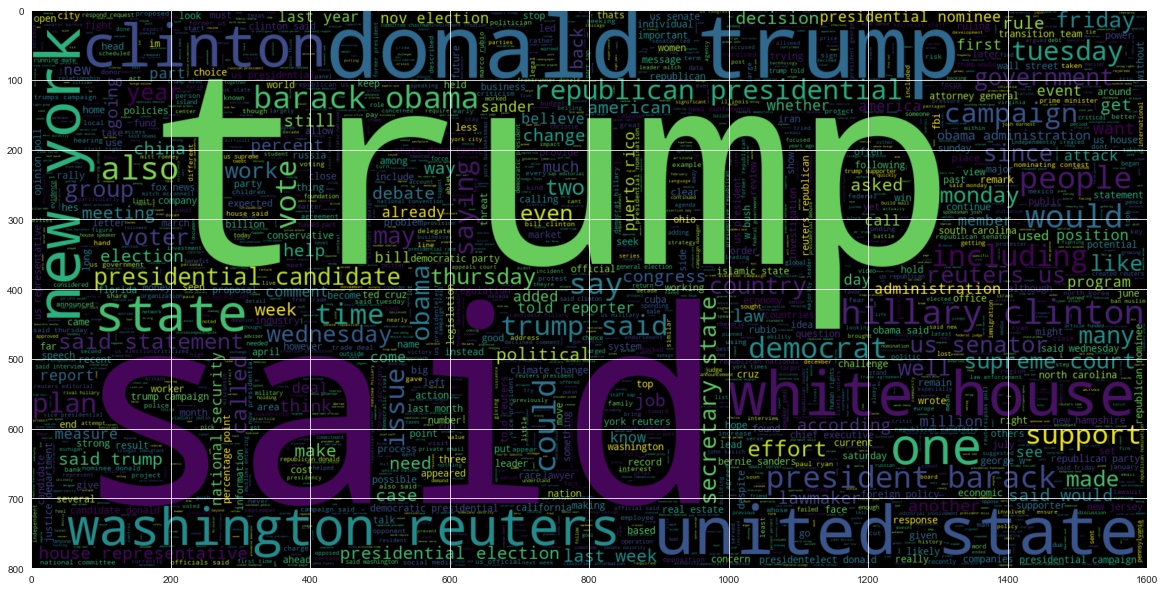

In [76]:
#wordcloud based on text
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop).generate(" ".join(news[news.label == '1'].text))
plt.imshow(wc , interpolation = 'bilinear')

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\core\_methods.py:

ValueError: cannot convert float NaN to integer

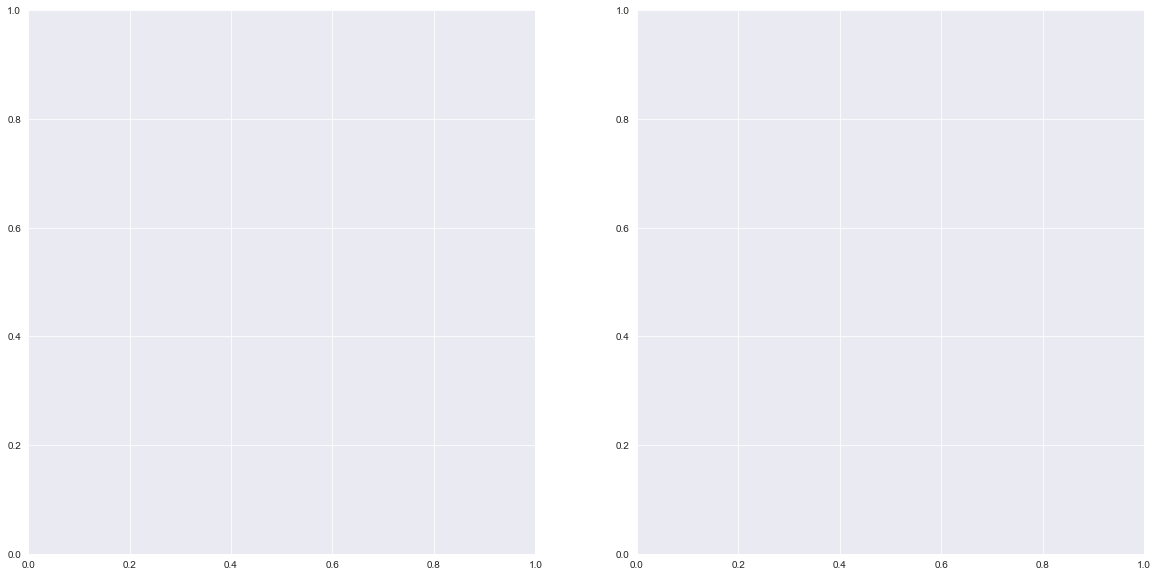

In [74]:
# I got errors for the following codes

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=news[news['label']=='1']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=news[news['label']=='0']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [160]:
news.head(5)

,title,text,subject,date,label
0,trump ditches press make “last minute” surpris...,presidentelect donald trump played round golf ...,politics,2016-12-31 00:00:00,0
1,countdown ticker obama leaves office in…54321…,function var sdocumentcreateelementscriptssrcw...,politics,2016-12-31 00:00:00,0
2,boom tomi lahrens top tips liberals 2017,,politics,2016-12-31 00:00:00,0
3,yes obama…there magic wand,,politics,2016-12-31 00:00:00,0
4,ha donald trumps unusual new years tweet “many...,presidentelect donald trump throwing private n...,politics,2016-12-31 00:00:00,0


In [165]:
# drop those empty text data 
news = news[news.text != '']

In [167]:
news.head(5)

,title,text,subject,date,label
0,trump ditches press make “last minute” surpris...,presidentelect donald trump played round golf ...,politics,2016-12-31 00:00:00,0
1,countdown ticker obama leaves office in…54321…,function var sdocumentcreateelementscriptssrcw...,politics,2016-12-31 00:00:00,0
4,ha donald trumps unusual new years tweet “many...,presidentelect donald trump throwing private n...,politics,2016-12-31 00:00:00,0
7,sheriff clarke destroys idiocy gun control dem...,usual milwaukee outspoken sheriff david clarke...,politics,2016-12-30 00:00:00,0
8,putin pushes reset button america surprising move,chess match political wills putin coin well ob...,politics,2016-12-30 00:00:00,0


In [168]:
# select the title and text data, and 
X = news[['title', 'text']]

In [170]:
# The outcome is always label
Y = news[['label']]

In [184]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [186]:
len(train_y[train_y.label =="0"])

1955

In [187]:
# Split the data as two sources: title and text 
train_titleX = train_x[['title']]
train_textX = train_x[['text']]
test_titleX = test_x[['title']]
test_textX = test_x[['text']]